
ID = Unique Identifier of a row

Age = Age of the customer

Gender = Gender of the customer (Male and Female)

Income = Yearly income of the customer

Balance = Average quarterly balance of the customer

Vintage = No. of years the customer is associated with bank

Transaction_Status = Whether the customer has done any transaction in the past 3 months or not

Product_Holdings = No. of product holdings with the bank

Credit_Card = Whether the customer has a credit card or not

Credit_Category = Category of a customer based on the credit score

Is_Churn = Whether the customer will churn in next 6 months or not

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
train = pd.read_csv("train_PDjVQMB.csv")

In [5]:
train.head(10)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
7,f422388a,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,773aa149,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1
9,443be80f,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [7]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [8]:
print("Age :",train.Age.nunique())
print("Gender :",train.Gender.nunique())
print("Income :",train.Income.nunique())
print("Vintage :",train.Vintage.nunique())
print("Transaction_Status :",train.Transaction_Status.nunique())
print("Product_Holdings :",train.Product_Holdings.nunique())
print("Credit_Card :",train.Credit_Card.nunique())
print("Credit_Category :",train.Credit_Category.nunique())
print("Is_Churn :",train.Is_Churn.nunique())


Age : 52
Gender : 2
Income : 4
Vintage : 6
Transaction_Status : 2
Product_Holdings : 3
Credit_Card : 2
Credit_Category : 3
Is_Churn : 2


In [9]:
test = pd.read_csv("test_lTY72QC.csv")

In [10]:
test.head(10)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
5,5aee459a,52,Female,More than 15L,788950.44,3,0,1,1,Good
6,3e83f7ea,45,Male,5L - 10L,1531320.12,3,0,1,1,Poor
7,ed4dfbd0,49,Male,5L - 10L,735035.40,2,1,2,1,Good
8,3911bea6,41,Female,More than 15L,1419096.96,1,0,2,1,Poor
9,e04eff55,38,Female,5L - 10L,929025.18,1,1,1,1,Good


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [12]:
test.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card
count,2851.000000,2.851000e+03,2851.000000,2851.000000,2851.000000
mean,41.252192,8.098990e+05,2.220975,0.506840,0.668888
std,9.616756,5.252003e+05,1.489941,0.500041,0.470696
min,21.000000,1.503000e+03,0.000000,0.000000,0.000000
25%,34.000000,4.009684e+05,1.000000,0.000000,0.000000
50%,40.000000,7.659125e+05,2.000000,1.000000,1.000000
75%,47.000000,1.154238e+06,3.000000,1.000000,1.000000
max,72.000000,2.434834e+06,5.000000,1.000000,1.000000


In [13]:
print("Age :",test.Age.nunique())
print("Gender :",test.Gender.nunique())
print("Income :",test.Income.nunique())
print("Vintage :",test.Vintage.nunique())
print("Transaction_Status :",test.Transaction_Status.nunique())
print("Product_Holdings :",test.Product_Holdings.nunique())
print("Credit_Card :",test.Credit_Card.nunique())
print("Credit_Category :",test.Credit_Category.nunique())


Age : 52
Gender : 2
Income : 4
Vintage : 6
Transaction_Status : 2
Product_Holdings : 3
Credit_Card : 2
Credit_Category : 3


In [14]:
print("Income :",test.Income.unique())
print("Vintage :",test.Vintage.unique())
print("Product_Holdings :",test.Product_Holdings.unique())
print("Credit_Category :",test.Credit_Category.unique())
print("Age :",test.Age.unique())


Income : ['More than 15L' '5L - 10L' '10L - 15L' 'Less than 5L']
Vintage : [2 0 3 1 4 5]
Product_Holdings : ['2' '3+' '1']
Credit_Category : ['Average' 'Good' 'Poor']
Age : [50 36 25 41 48 52 45 49 38 27 40 59 39 46 34 42 26 29 31 63 43 67 37 35
 56 32 65 60 44 30 33 47 64 28 54 69 57 53 51 58 70 24 55 62 23 71 22 66
 61 68 21 72]


In [30]:
#print("Product_Holdings :",test.Product_Holdings.count())
test['Product_Holdings'].value_counts()


2     1359
1     1342
3+     150
Name: Product_Holdings, dtype: int64

In [32]:
test['Income'].value_counts()


10L - 15L        844
5L - 10L         794
Less than 5L     648
More than 15L    565
Name: Income, dtype: int64

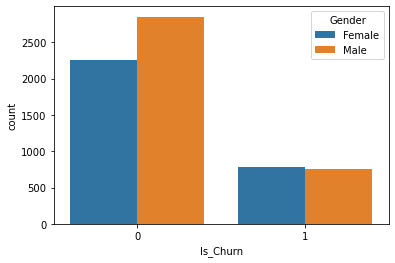

In [12]:
sns.countplot(x='Is_Churn',data=train,hue='Gender')

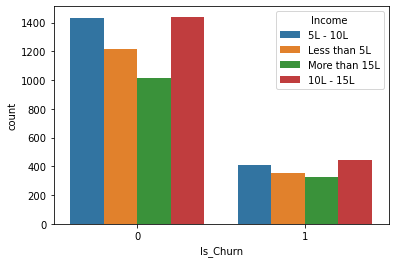

In [13]:
sns.countplot(x='Is_Churn',data=train, hue='Income')

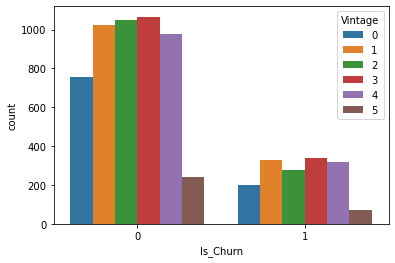

In [14]:
sns.countplot(x='Is_Churn',data=train,hue='Vintage')

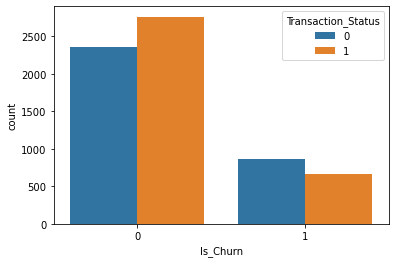

In [15]:
sns.countplot(x='Is_Churn',data=train, hue='Transaction_Status')

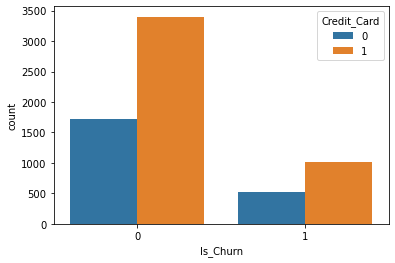

In [16]:
sns.countplot(x='Is_Churn',data=train, hue='Credit_Card')

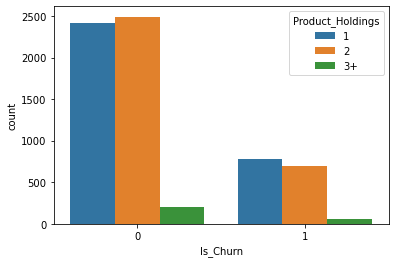

In [17]:
sns.countplot(x='Is_Churn',data=train, hue='Product_Holdings')

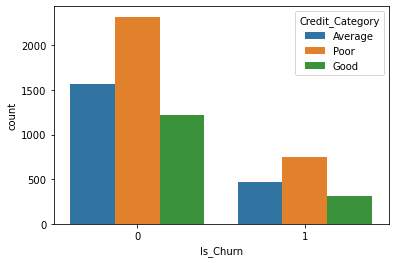

In [18]:
sns.countplot(x='Is_Churn',data=train, hue='Credit_Category')

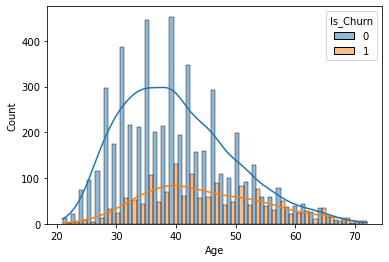

In [29]:
sns.histplot(data = train, x = "Age",hue = 'Is_Churn', kde = True, multiple='dodge')

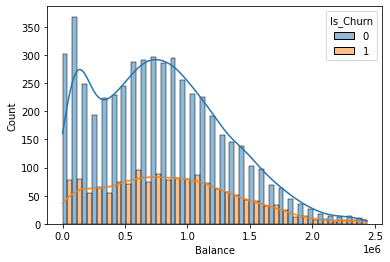

In [31]:
sns.histplot(data = train, x = "Balance",hue = 'Is_Churn', kde = True, multiple='dodge')

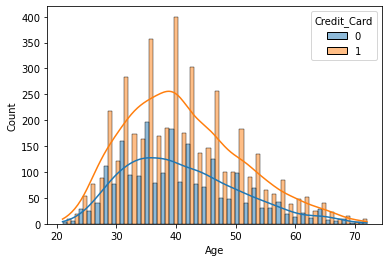

In [41]:
sns.histplot(data = train, x = "Age",hue = 'Credit_Card', kde = True, multiple='dodge')

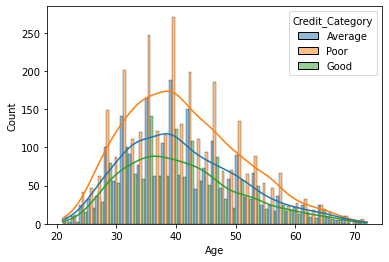

In [42]:
sns.histplot(data = train, x = "Age",hue = 'Credit_Category', kde = True, multiple='dodge')

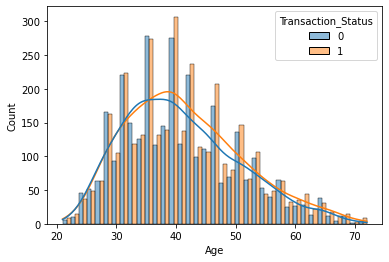

In [43]:
sns.histplot(data = train, x = "Age",hue = 'Transaction_Status', kde = True, multiple='dodge')